In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('result.csv', index_col = 0)

In [8]:
df.head()

,name,height,weight,generation,moves,forms,hp,attack,defense,special_attack,special_defense,speed,abilities,primary_type,secondary_type
id,,,,,,,,,,,,,,,
1,bulbasaur,7,69,1,"['razor-wind', 'swords-dance', 'cut', 'bind', ...",['bulbasaur'],45,49,49,65,65,45,"['overgrow', 'chlorophyll']",grass,poison
2,ivysaur,10,130,1,"['swords-dance', 'cut', 'bind', 'vine-whip', '...",['ivysaur'],60,62,63,80,80,60,"['overgrow', 'chlorophyll']",grass,poison
3,venusaur,20,1000,1,"['swords-dance', 'cut', 'bind', 'vine-whip', '...",['venusaur'],80,82,83,100,100,80,"['overgrow', 'chlorophyll']",grass,poison
4,charmander,6,85,1,"['mega-punch', 'fire-punch', 'thunder-punch', ...",['charmander'],39,52,43,60,50,65,"['blaze', 'solar-power']",fire,NaN
5,charmeleon,11,190,1,"['mega-punch', 'fire-punch', 'thunder-punch', ...",['charmeleon'],58,64,58,80,65,80,"['blaze', 'solar-power']",fire,NaN


In [5]:
#Scatterplot weight x height

<Axes: xlabel='weight', ylabel='height'>

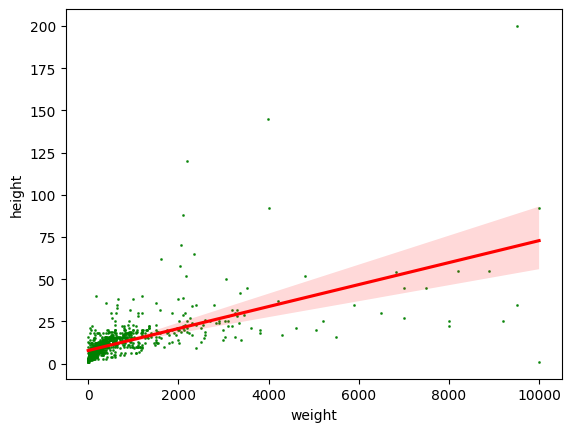

In [4]:
sns.regplot(data=df, x='weight', y='height',
           marker='o', color='g', scatter_kws={'s':1},
           line_kws=dict(color='r'))

In [7]:
#Heatmap - dual pokemon types

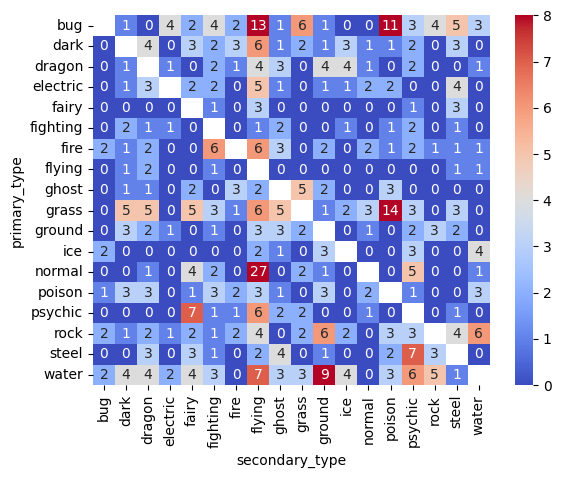

In [5]:
types_df = df.copy()

cross_tab = pd.crosstab(df['primary_type'], df['secondary_type'])

uniform_data = np.random.rand(18, 18)
diag_mask = np.eye(*uniform_data.shape, dtype=bool)

ax = sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d', vmin=0, vmax=8, mask=diag_mask)

In [8]:
#Boxplot size by primary type

[Text(0.5, 1.0, 'Size by primary type'),
 Text(0.5, 0, 'Height'),
 Text(0, 0.5, 'Primary type')]

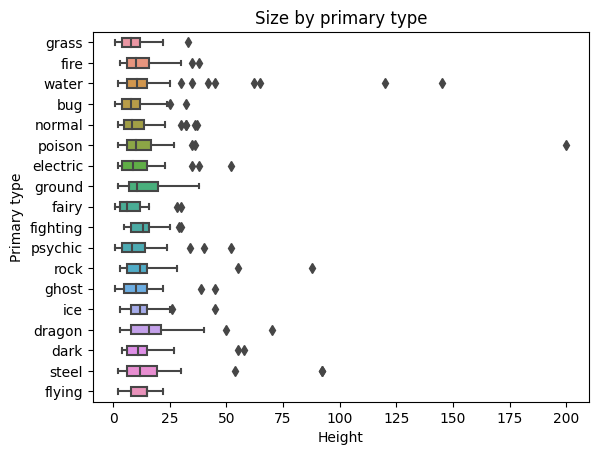

In [37]:
size_df = df.copy()

ax = sns.boxplot(data=size_df, y="primary_type", x="height", width=0.45)
ax.set(title = "Size by primary type",
      xlabel = "Height",
      ylabel = "Primary type")

In [9]:
#Boxplot weight by type

[Text(0.5, 1.0, 'Weight by primary type'),
 Text(0.5, 0, 'Weight'),
 Text(0, 0.5, 'Primary type')]

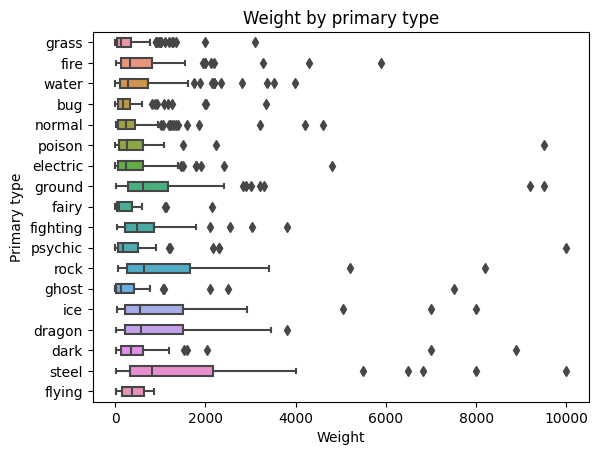

In [38]:
weight_df = df.copy()

ax = sns.boxplot(data=weight_df, y="primary_type", x="weight", width=0.45)
ax.set(title = "Weight by primary type",
      xlabel = "Weight",
      ylabel = "Primary type")

In [10]:
#Number of moves per type

In [11]:
#Average stats per generation

[Text(0.5, 1.0, 'Average stats per generation'),
 Text(0.5, 0, 'Generation'),
 Text(0, 0.5, 'Total stats')]

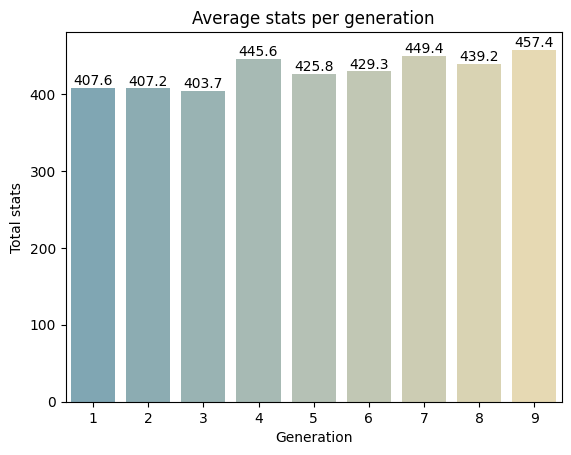

In [24]:
stats_df = df.copy()
stats_df['total_stats'] = stats_df['hp'] + stats_df['attack'] + stats_df['defense'] + stats_df['special_attack'] + stats_df['special_defense'] + stats_df['speed']

ax = sns.barplot(x="generation", y="total_stats", data=stats_df, 
                 estimator=lambda x: round(np.mean(x), 1), errorbar=('ci', 0), palette="blend:#7AB,#EDA")
ax.bar_label(ax.containers[0])
ax.set(title = "Average stats per generation",
      xlabel = "Generation",
      ylabel = "Total stats")

In [12]:
#Type effectiveness heatmap

In [19]:
from typeEffectiveness import damage_array, pokemon_types

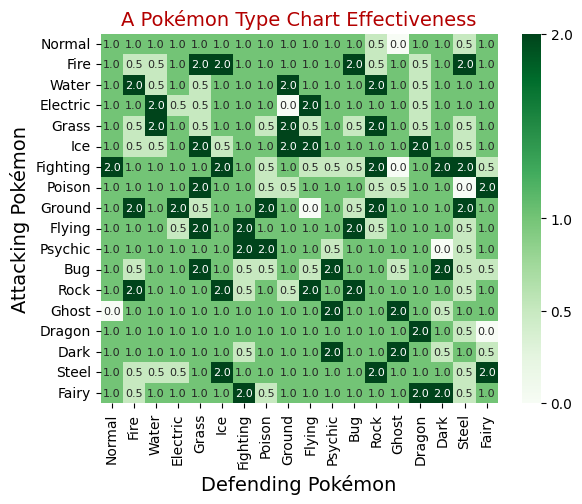

In [20]:
ax = sns.heatmap(damage_array, annot=damage_array, fmt='', cmap="Greens",
                 xticklabels=pokemon_types, yticklabels=pokemon_types, annot_kws={'size': 8})

cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 0.5, 1, 2])
ax.set_xlabel("Defending Pokémon", size=14)
ax.set_ylabel("Attacking Pokémon", size=14)
plt.title("A Pokémon Type Chart Effectiveness", size=14, color="#b30000")
plt.show()

In [13]:
#Stats correlation heatmap

In [ ]:
#Amount of abilities

In [88]:
len_df = df.copy()
len_df['abilities'] = len_df['abilities'].apply(eval)
len_df['abilities_count'] = len_df.abilities.map(len)

[Text(0, 0, '141'), Text(0, 0, '354'), Text(0, 0, '530')]

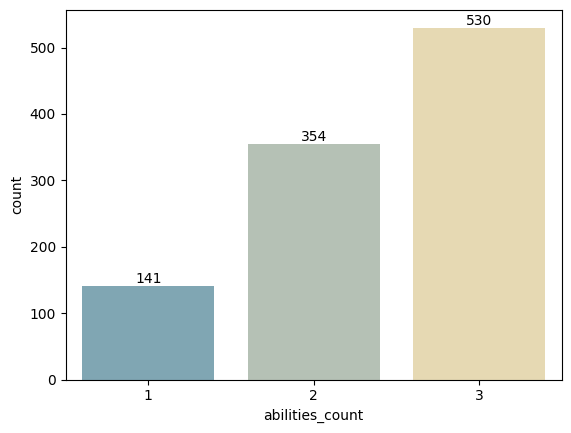

In [98]:
ax = sns.countplot(data=len_df, x='abilities_count', palette='blend:#7AB,#EDA')
ax.bar_label(ax.containers[0])